You can load the data sets either from snappy compressed parquet files or from an HDF5 file store. Both formats contain the same data. There is no need to import both (parquet and HDF5). 
The parquet files are much more compressed and therefore faster to download. But you need to install pyArrow in your environment. An HDF5 library is already available in the anaconda base environment.

In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

# How to load train and validation set from Parquet

In [121]:
train = pd.read_parquet("c99temp_train_pseudo.snappy.parquet")
valid = pd.read_parquet("c99temp_valid_pseudo.snappy.parquet")

First combine the train and validation data sets. So they can be split up again by machine configuration instead.

In [122]:
combined = pd.concat([train,valid])

In [123]:
combined.sort_values('timestamp')

,timestamp,cpuType,cpuBoard,tempBoardAK0,tempBoardSLAVE,remainingLifetime,machineNumberPseudo
576600,2011-01-03 00:23:16.032,Intel(R) Celeron(R) M processor 1.50GHz,886LCD-M/ATX 08_01_07,35.730833,37.000000,280,Vr3Gfh
586944,2011-01-03 00:51:02.924,INTEL Pentium III CPU,CB60-BX/C 09_11_02,56.052727,46.000000,959,oxNC2Y
1212905,2011-01-03 00:55:14.744,Intel(R) Celeron(R) M processor 1.50GHz,886LCD-M/ATX 08_01_07,-99.000000,43.000000,274,BxsN x
554824,2011-01-03 00:57:23.493,INTEL Pentium III CPU,CB60-BX/C 09_11_02,53.658333,41.250000,780,6ZjDcM
189670,2011-01-03 00:57:40.056,INTEL Pentium II CPU,P2B1012 03_03_00,46.505833,40.833333,1516,oEG9de
329313,2011-01-03 00:57:45.684,Intel(R) Celeron(R) M processor 1.50GHz,AIMB-750VE 11_29_06,42.524783,45.478261,133,YGJdPp
683814,2011-01-03 00:58:41.880,INTEL Pentium III CPU,CB60-BX/C 09_11_02,35.425000,38.416667,23,M3wmEn
87827,2011-01-03 00:58:51.812,INTEL Pentium III CPU,CB60-BX/C 09_11_02,54.231250,40.500000,1102,3XURDR
275582,2011-01-03 01:56:59.969,INTEL Pentium III CPU,CB60-BX/C 09_11_02,33.293333,35.916667,23,M3wmEn
855948,2011-01-03 01:57:57.746,Intel(R) Celeron(R) M processor 1.50GHz,AIMB-750VE 11_29_06,42.287500,45.000000,133,YGJdPp


Remove datapoints where the temperature is negative>

In [238]:
filtered = combined[(combined['tempBoardAK0'] > 0) & (combined['tempBoardSLAVE'] > 0)]

Get a list of CPUs and Mainboards

In [125]:
cpus = combined.cpuType.unique()
mainboards = combined.cpuBoard.unique()

Determine the possible machine configurations:

In [126]:
machine_configs_df = combined.groupby(['cpuType','cpuBoard']).size().reset_index().rename(columns={0:'count'})
machine_configs = machine_configs_df[['cpuType', 'cpuBoard']].values.tolist()
machine_configs_df

,cpuType,cpuBoard,count
0,Celeron(R) Dual-Core CPU T3100 @ 1.90GHz,KTGM45/ATXP2Core 07_01_14,62936
1,INTEL Pentium II CPU,P2B1010 07_16_99,33983
2,INTEL Pentium II CPU,P2B1012 03_03_00,12485
3,INTEL Pentium III CPU,CB60-BX 06_13_00,1552
4,INTEL Pentium III CPU,CB60-BX/C 09_11_02,1140224
5,INTEL Pentium III CPU,P2B1010 07_16_99,7523
6,INTEL Pentium III CPU,UNKNOWN 08_01_07,8734
7,Intel(R) Atom(TM) CPU 230 @ 1.60GHz,INTEL_D945GCLF 05_28_09,8
8,Intel(R) Celeron(R) CPU G1620 @ 2.70GHz,MAHOBAY 08_26_14,64136
9,Intel(R) Celeron(R) M processor 1.50GHz,886LCD-M/ATX 08_01_07,649412


In [127]:
combined[combined['tempBoardAK0'] > 0].groupby(['cpuType','cpuBoard'])['tempBoardAK0'].mean()

cpuType                                   cpuBoard                  
Celeron(R) Dual-Core CPU T3100 @ 1.90GHz  KTGM45/ATXP2Core  07_01_14    38.699856
INTEL Pentium II CPU                      P2B1010  07_16_99             46.969025
                                          P2B1012  03_03_00             51.465965
INTEL Pentium III CPU                     CB60-BX  06_13_00             57.710371
                                          CB60-BX/C  09_11_02           50.366353
                                          P2B1010  07_16_99             59.541247
                                          UNKNOWN  08_01_07             39.637498
Intel(R) Atom(TM) CPU 230 @ 1.60GHz       INTEL_D945GCLF  05_28_09      33.053915
Intel(R) Celeron(R) CPU G1620 @ 2.70GHz   MAHOBAY  08_26_14             42.828115
Intel(R) Celeron(R) M processor 1.50GHz   886LCD-M/ATX  08_01_07        45.571616
                                          AIMB-750VE  11_29_06          42.335615
na                           

In [128]:
combined[combined['tempBoardAK0'] > 0].groupby(['cpuType','cpuBoard'])['tempBoardAK0'].std()

cpuType                                   cpuBoard                  
Celeron(R) Dual-Core CPU T3100 @ 1.90GHz  KTGM45/ATXP2Core  07_01_14     9.387843
INTEL Pentium II CPU                      P2B1010  07_16_99              9.674296
                                          P2B1012  03_03_00              3.022507
INTEL Pentium III CPU                     CB60-BX  06_13_00              3.233550
                                          CB60-BX/C  09_11_02            7.585950
                                          P2B1010  07_16_99              1.320553
                                          UNKNOWN  08_01_07              3.852898
Intel(R) Atom(TM) CPU 230 @ 1.60GHz       INTEL_D945GCLF  05_28_09       0.407538
Intel(R) Celeron(R) CPU G1620 @ 2.70GHz   MAHOBAY  08_26_14             11.075269
Intel(R) Celeron(R) M processor 1.50GHz   886LCD-M/ATX  08_01_07         9.588185
                                          AIMB-750VE  11_29_06           6.366407
na                           

Get computer names

In [211]:
combined.groupby(['machineNumberPseudo'])['tempBoardAK0'].mean()
computersList = combined.machineNumberPseudo.unique().tolist()

Define windows before failure (ranges):

In [239]:
ranges = [[10, 40],
          [40, 80],
          [80, 150],
          [150, 300]]

Determine the temperature delta of the mean temperature for each computer from one window before failure to the next.

In [240]:
restricted = filtered[(filtered['remainingLifetime'] > 1) & (filtered['remainingLifetime'] < 10)]
range_time_deltas = restricted.groupby(['machineNumberPseudo','cpuType','cpuBoard']).mean().reset_index().set_index('machineNumberPseudo')
previous_T = range_time_deltas

for day_range in ranges:
    restricted = filtered[(filtered['remainingLifetime'] > day_range[0]) & (filtered['remainingLifetime'] < day_range[1])]
    current_T = restricted.groupby(['machineNumberPseudo','cpuType','cpuBoard']).mean().reset_index().set_index('machineNumberPseudo')
    range_time_deltas[('deltaT_' + str(day_range[0]))] = current_T['tempBoardAK0'] - previous_T['tempBoardAK0']
    previous_T = current_T

Plot distribution of deltas for all of the machines, grouped by CPU type.

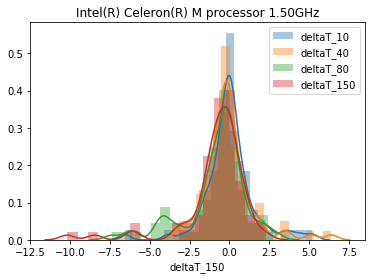

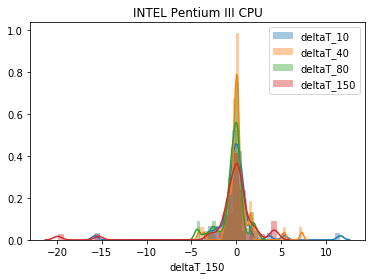

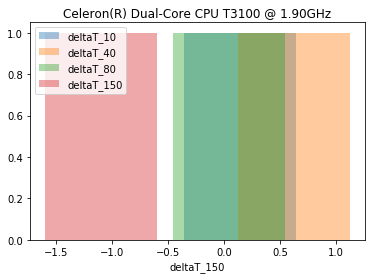

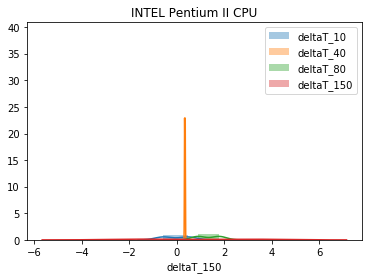

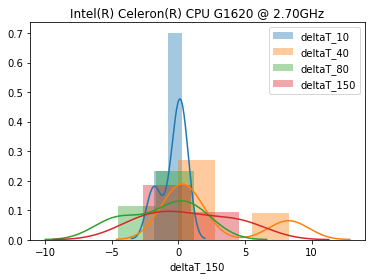

In [241]:
for cpuType in range(5):
    plt.figure("Test Plots")
    for i, day_range in enumerate(ranges):
        col_label = 'deltaT_' + str(day_range[0])
        
        to_plot = range_time_deltas[(range_time_deltas['cpuType'] == cpus[cpuType])][col_label]
        g = sns.distplot(to_plot.dropna(), label=col_label)

    plt.title(cpus[cpuType])
    plt.legend()
    plt.show()

# Your Tasks

## 1. Predict remaining lifetime on the validation set 

The validation metric is your own choice.

We will evaluate your final model on a secret test set with different machine numbers.

## 2. Ensure a good user experience

Some aspects to think about:
- Can you explain your predictions to the user? 
    - Extrapolating the temperature trend could be helpful. 
    - Informing about the usual temperature range of similar machines might also be nice.
- Are there sudden changes in the remaining lifetime you predicted (one day it's 500 days, the next day it's only 5)? This might confuse the user.
- How confident are you about your predictions?
- Is there a minimum confidence that should be given, before alerting the user?
- Should you display information about the certainty of your prediction to the user?